<a href="https://colab.research.google.com/github/YuyangXie1998/DataGlacier/blob/main/W2_cab_investment_case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# G2M insight for Cab Investment firm

## 1. Business Problems

In this case, we will mainly investigate two business problems as follows:
1. Is there any seasonality in number of customers using the cab service?
2. Which company has maximum cab users at a particular time period?

In [ ]:
# Does margin proportionally increase with increase in number of customers?
# What are the attributes of these customer segments?

## 2. Data Preparation

In [1]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

### 2.1 Data Loading

In [2]:
url_cab = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
url_city = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
url_cust = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
url_tran = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'

In [3]:
import requests
#just a dummy file URL
info1 = requests.head(url_cab)
info2 = requests.head(url_city)
info3 = requests.head(url_cust)
info4 = requests.head(url_tran)
#fetching the header information
print(info1.headers)
print(info2.headers)
print(info3.headers)
print(info4.headers)
#printing the details

{'Connection': 'keep-alive', 'Content-Length': '5240663', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"14e4000dab3162a866b3e02d33910d0c01caf906390c3e3646f2cde108c0ee88"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '382A:54AC:16B3:2C37:627F33BC', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Sat, 14 May 2022 04:54:15 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-hkg17920-HKG', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1652504056.537984,VS0,VE7', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': 'cc469228e55596a6a7955ba34a842c07bfe8e770', 'Expires': 'Sat, 14 May 2022 04:59:15 GMT', 'Source-Age': '139'}
{'Connection': 'keep-alive', 'Content-Length'

In [4]:
df_cab = pd.read_csv(url_cab)
df_city = pd.read_csv(url_city)
df_cust = pd.read_csv(url_cust)
df_tran = pd.read_csv(url_tran)

In [5]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
df_cab.shape

(359392, 7)

In [7]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
df_city.shape

(20, 3)

In [9]:
df_cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df_cust.shape

(49171, 4)

In [11]:
df_tran.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
df_tran.shape

(440098, 3)

### 2.2 Data Processing

#### 2.2.1 Field/feature transformations

In [13]:
df_cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [14]:
from datetime import date, datetime, timedelta

for i in range(len(df_cab['Date of Travel'])):
  df_cab['Date of Travel'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_cab['Date of Travel'][i] - 2).date()

df_cab["Date of Travel"] = pd.to_datetime(df_cab["Date of Travel"], format = '%Y-%m-%d', errors = 'coerce')
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [16]:
for i in df_city['Population']:
  df_city['Population'] = df_city['Population'].replace(',', '', regex=True)
  df_city['Population'] = pd.to_numeric(df_city['Population'])

df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,"302,149"
1,CHICAGO IL,1955130,"164,468"
2,LOS ANGELES CA,1595037,"144,132"
3,MIAMI FL,1339155,"17,675"
4,SILICON VALLEY,1177609,"27,247"


In [17]:
for i in df_city['Users']:
  df_city['Users'] = df_city['Users'].replace(',', '', regex=True)
  df_city['Users'] = pd.to_numeric(df_city['Users'])

df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [18]:
df_cust.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [19]:
df_tran.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

#### 2.2.2 Create master data

In [20]:
df = pd.merge(df_cab, df_city, how='left', left_on='City', right_on='City')
df = pd.merge(df, df_tran, how='left', left_on='Transaction ID', right_on='Transaction ID')
df = pd.merge(df, df_cust, how='left', left_on='Customer ID', right_on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536


In [21]:
df['Net Margin %'] = (df['Price Charged'] - df['Cost of Trip'])/df['Price Charged']*100
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Net Margin %
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,15.450869
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,6.601026
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,22.019169
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,6.835718
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,14.695516


In [22]:
df.shape

(359392, 15)

#### 2.2.3 Identify and remove duplicates

In [23]:
df_dedupe = df.copy()
df_dedupe = df_dedupe.sort_values(by='Date of Travel', ascending=True)
df_dedupe = df_dedupe.drop_duplicates(subset='Customer ID', keep='last')
df_dedupe.shape

(46148, 15)

In [24]:
df_dedupe.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Net Margin %
858,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.200,943999,6133,21481,Card,Male,28,18030,59.700956
863,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,545776,7044,47687,Card,Male,25,16088,48.639973
194,10000345,2016-01-02,Pink Cab,SEATTLE WA,20.40,259.48,234.600,671238,25063,37896,Card,Male,39,7143,9.588408
153,10000164,2016-01-02,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,943999,6133,22469,Card,Male,37,4378,21.353482
152,10000163,2016-01-02,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,943999,6133,22557,Cash,Male,38,8808,31.759117


## 3. EDA

### 3.1 Desciptive Analysis

#### 3.1.1 Common

In [25]:
# Data Type
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Population                     int64
Users                          int64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Net Margin %                 float64
dtype: object

In [26]:
# Missing Value
#pd.set_option('display.max_rows', None)
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Net Margin %          0
dtype: int64

#### 3.1.2 Categorical

In [27]:
# cardinality
df[['Company', 'City', 'Payment_Mode']].nunique()

Company          2
City            19
Payment_Mode     2
dtype: int64

In [28]:
# cardinality
df_dedupe[['Gender']].nunique()

Gender    2
dtype: int64

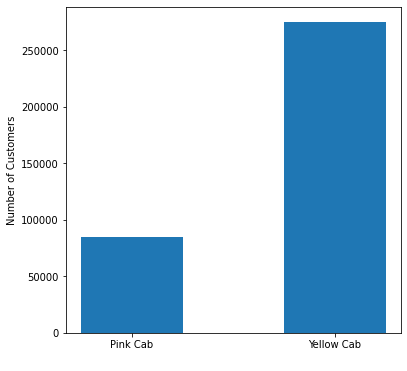

In [29]:
# unique counts
# Company
plt.figure(figsize=(6,6))
plt.hist(df['Company'], bins=np.arange(3)-0.5, rwidth=.5)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

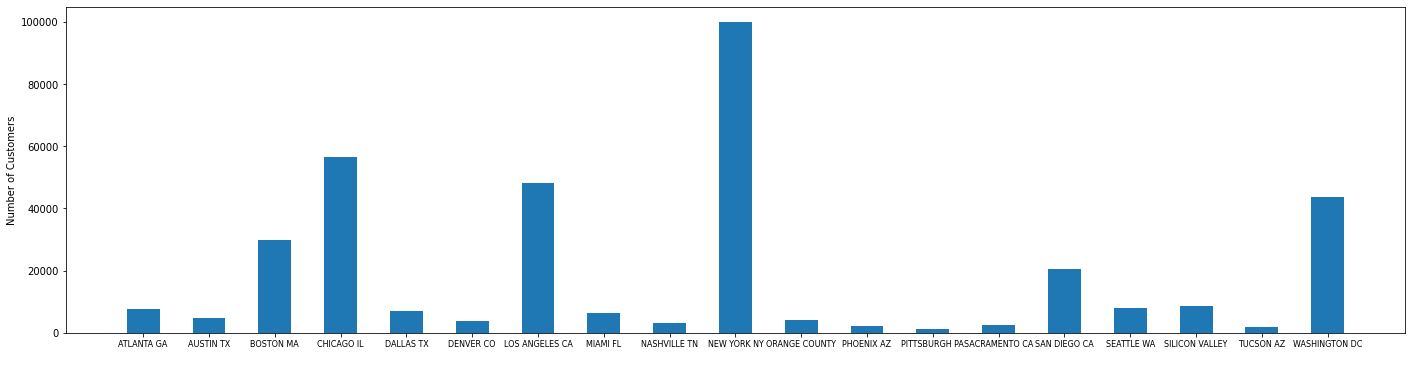

In [30]:
# unique counts
# City
plt.figure(figsize=(24,6))
plt.hist(df['City'], bins=np.arange(20)-0.5, rwidth=.5)
plt.ylabel("Number of Customers")
plt.xlabel(" ")
plt.xticks(fontsize=8)

plt.show()

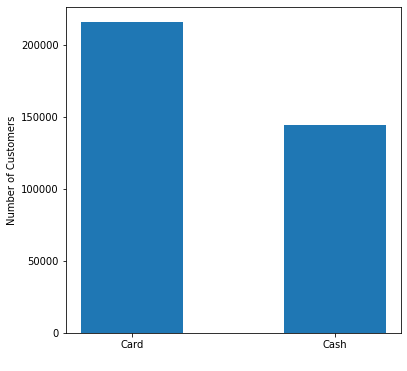

In [31]:
# unique counts
# Payment Mode
plt.figure(figsize=(6,6))
plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

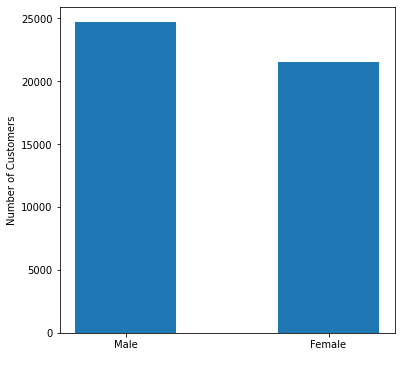

In [32]:
# unique counts
# Gender
plt.figure(figsize=(6,6))
plt.hist(df_dedupe['Gender'], bins=np.arange(3)-0.5, rwidth=.5)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

#### 3.1.3 Numerical

In [33]:
# descriptive statistics
df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Net Margin %']].describe()

,KM Travelled,Price Charged,Cost of Trip,Net Margin %
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,27.128413
std,12.233526,274.378911,157.993661,18.550100
min,1.900000,15.600000,19.000000,-69.301505
25%,12.000000,206.437500,151.200000,13.855876
50%,22.440000,386.360000,282.480000,26.430302
75%,32.960000,583.660000,413.683200,41.611989
max,48.000000,2048.030000,691.200000,76.202636


In [34]:
# descriptive statistics
df_dedupe[['Age', 'Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,46148.000000,46148.000000
mean,35.358499,14997.863764
std,12.605460,7999.204793
min,18.000000,2000.000000
25%,25.000000,8289.750000
50%,33.000000,14625.500000
75%,42.000000,21022.000000
max,65.000000,35000.000000


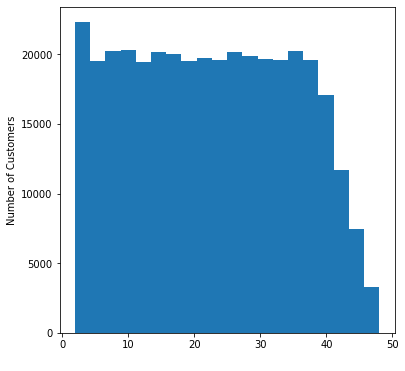

In [35]:
# distribution histograms
# KM Travelled
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df['KM Travelled'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

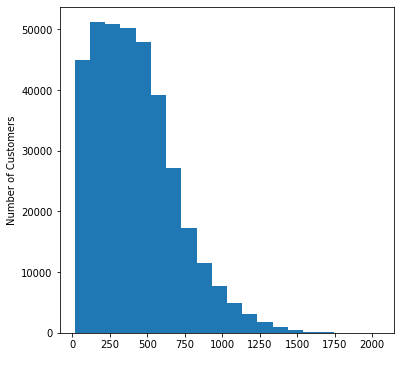

In [36]:
# distribution histograms
# Price Charged
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df['Price Charged'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

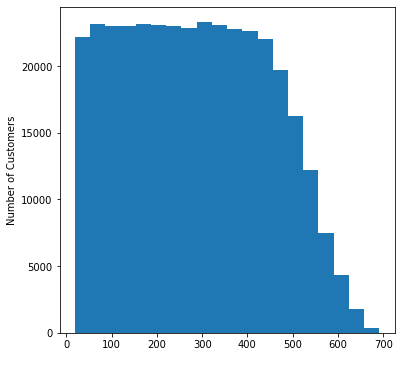

In [37]:
# distribution histograms
# Cost of Trip
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df['Cost of Trip'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

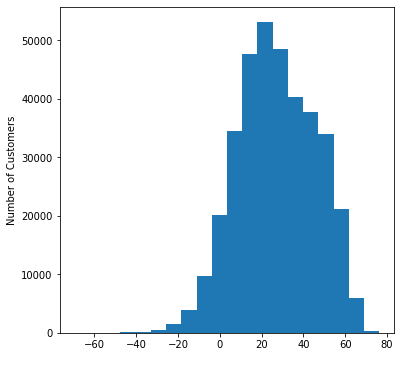

In [38]:
# distribution histograms
# Net Margin %
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df['Net Margin %'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

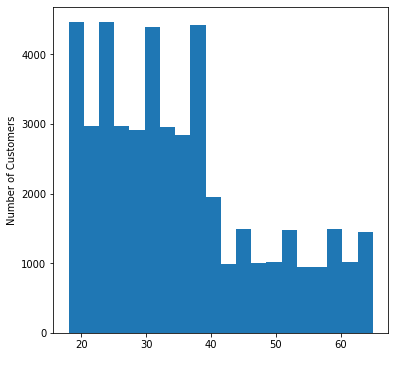

In [39]:
# distribution histograms
# Age
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df_dedupe['Age'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

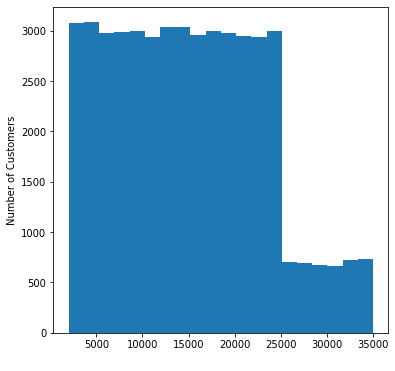

In [40]:
# distribution histograms
# Income (USD/Month)
plt.figure(figsize=(6,6))
#plt.hist(df['Payment_Mode'], bins=np.arange(3)-0.5, rwidth=.5)
plt.hist(df_dedupe['Income (USD/Month)'], bins=20)
plt.ylabel("Number of Customers")
plt.xlabel(" ")

plt.show()

### 3.2 Correlation Analysis

In [41]:
# categorical
from scipy.stats import chi2_contingency

#pd.crosstab(df_dedupe.Gender, df_dedupe.Company, margins=True)
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Gender, df_dedupe.Company, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.017


In [42]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Gender, df_dedupe.City, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.0


In [43]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Gender, df_dedupe.Payment_Mode, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.133


In [44]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Payment_Mode, df_dedupe.Company, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.468


In [45]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Payment_Mode, df_dedupe.City, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.955


In [46]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df_dedupe.Company, df_dedupe.City, margins=True))
 
print("p_value: ",round(p,3))

p_value:  0.0


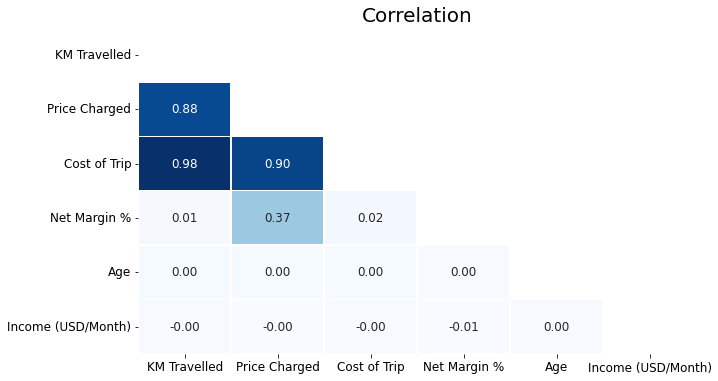

In [47]:
# numerical
corr = df_dedupe[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Net Margin %', 'Age', 'Income (USD/Month)']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['font.size'] = 12
plt.figure(figsize = (10,6))
ax = sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5, mask=mask, cmap='Blues', cbar=False)
plt.title('Correlation', fontsize=20, x=0.5, y=1)
plt.xticks(rotation=0)
plt.show()

In [48]:
# categorical vs. numerical
#grp1 = df_dedupe.groupby(df_dedupe['Company'])[['Net Margin %', 'Age', 'Income (USD/Month)']].mean()
#grp1.head()
import scipy.stats as stats
 
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Company=="Pink Cab"')['Net Margin %'],
                                df_dedupe.query('Company=="Yellow Cab"')['Net Margin %'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [49]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Company=="Pink Cab"')['Age'],
                                df_dedupe.query('Company=="Yellow Cab"')['Age'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.758


In [50]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Company=="Pink Cab"')['Income (USD/Month)'],
                                df_dedupe.query('Company=="Yellow Cab"')['Income (USD/Month)'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.697


In [51]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Gender=="Female"')['Net Margin %'],
                                df_dedupe.query('Gender=="Male"')['Net Margin %'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.599


In [52]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Gender=="Female"')['Age'],
                                df_dedupe.query('Gender=="Male"')['Age'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.28


In [53]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Gender=="Female"')['Income (USD/Month)'],
                                df_dedupe.query('Gender=="Male"')['Income (USD/Month)'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.297


In [54]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Payment_Mode=="Card"')['Net Margin %'],
                                df_dedupe.query('Payment_Mode=="Cash"')['Net Margin %'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.906


In [55]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Payment_Mode=="Card"')['Age'],
                                df_dedupe.query('Payment_Mode=="Cash"')['Age'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.609


In [56]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('Payment_Mode=="Card"')['Income (USD/Month)'],
                                df_dedupe.query('Payment_Mode=="Cash"')['Income (USD/Month)'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.672


In [57]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('City=="NEW YORK NY"')['Net Margin %'],
                                df_dedupe.query('City=="CHICAGO IL"')['Net Margin %'],
                                df_dedupe.query('City=="LOS ANGELES CA"')['Net Margin %'],
                                df_dedupe.query('City=="MIAMI FL"')['Net Margin %'],
                                df_dedupe.query('City=="SILICON VALLEY"')['Net Margin %'],
                                df_dedupe.query('City=="ORANGE COUNTY"')['Net Margin %'],
                                df_dedupe.query('City=="SAN DIEGO CA"')['Net Margin %'],
                                df_dedupe.query('City=="PHOENIX AZ"')['Net Margin %'],
                                df_dedupe.query('City=="DALLAS TX"')['Net Margin %'],
                                df_dedupe.query('City=="ATLANTA GA"')['Net Margin %'],
                                df_dedupe.query('City=="DENVER CO"')['Net Margin %'],
                                df_dedupe.query('City=="AUSTIN TX"')['Net Margin %'],
                                df_dedupe.query('City=="SEATTLE WA"')['Net Margin %'],
                                df_dedupe.query('City=="TUCSON AZ"')['Net Margin %'],
#                                df_dedupe.query('City=="SAN FRANCISCO CA"')['Net Margin %'],
                                df_dedupe.query('City=="SACRAMENTO CA"')['Net Margin %'],
                                df_dedupe.query('City=="PITTSBURGH PA"')['Net Margin %'],
                                df_dedupe.query('City=="WASHINGTON DC"')['Net Margin %'],
                                df_dedupe.query('City=="NASHVILLE TN"')['Net Margin %'],
                                df_dedupe.query('City=="BOSTON MA"')['Net Margin %'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.0


In [58]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('City=="NEW YORK NY"')['Age'],
                                df_dedupe.query('City=="CHICAGO IL"')['Age'],
                                df_dedupe.query('City=="LOS ANGELES CA"')['Age'],
                                df_dedupe.query('City=="MIAMI FL"')['Age'],
                                df_dedupe.query('City=="SILICON VALLEY"')['Age'],
                                df_dedupe.query('City=="ORANGE COUNTY"')['Age'],
                                df_dedupe.query('City=="SAN DIEGO CA"')['Age'],
                                df_dedupe.query('City=="PHOENIX AZ"')['Age'],
                                df_dedupe.query('City=="DALLAS TX"')['Age'],
                                df_dedupe.query('City=="ATLANTA GA"')['Age'],
                                df_dedupe.query('City=="DENVER CO"')['Age'],
                                df_dedupe.query('City=="AUSTIN TX"')['Age'],
                                df_dedupe.query('City=="SEATTLE WA"')['Age'],
                                df_dedupe.query('City=="TUCSON AZ"')['Age'],
#                                df_dedupe.query('City=="SAN FRANCISCO CA"')['Age'],
                                df_dedupe.query('City=="SACRAMENTO CA"')['Age'],
                                df_dedupe.query('City=="PITTSBURGH PA"')['Age'],
                                df_dedupe.query('City=="WASHINGTON DC"')['Age'],
                                df_dedupe.query('City=="NASHVILLE TN"')['Age'],
                                df_dedupe.query('City=="BOSTON MA"')['Age'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.136


In [59]:
fvalue, pvalue = stats.f_oneway(df_dedupe.query('City=="NEW YORK NY"')['Income (USD/Month)'],
                                df_dedupe.query('City=="CHICAGO IL"')['Income (USD/Month)'],
                                df_dedupe.query('City=="LOS ANGELES CA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="MIAMI FL"')['Income (USD/Month)'],
                                df_dedupe.query('City=="SILICON VALLEY"')['Income (USD/Month)'],
                                df_dedupe.query('City=="ORANGE COUNTY"')['Income (USD/Month)'],
                                df_dedupe.query('City=="SAN DIEGO CA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="PHOENIX AZ"')['Income (USD/Month)'],
                                df_dedupe.query('City=="DALLAS TX"')['Income (USD/Month)'],
                                df_dedupe.query('City=="ATLANTA GA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="DENVER CO"')['Income (USD/Month)'],
                                df_dedupe.query('City=="AUSTIN TX"')['Income (USD/Month)'],
                                df_dedupe.query('City=="SEATTLE WA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="TUCSON AZ"')['Income (USD/Month)'],
#                                df_dedupe.query('City=="SAN FRANCISCO CA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="SACRAMENTO CA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="PITTSBURGH PA"')['Income (USD/Month)'],
                                df_dedupe.query('City=="WASHINGTON DC"')['Income (USD/Month)'],
                                df_dedupe.query('City=="NASHVILLE TN"')['Income (USD/Month)'],
                                df_dedupe.query('City=="BOSTON MA"')['Income (USD/Month)'])
 
print("p_value: ",round(pvalue,3))

p_value:  0.545


### 3.3 Contextual Analysis

#### 3.3.1 Seasonality

In [62]:
time_grp1 = df.groupby(df['Date of Travel'].dt.year)['Net Margin %'].mean()
time_grp1

Date of Travel
2016    28.252887
2017    28.137357
2018    25.102427
Name: Net Margin %, dtype: float64

In [63]:
time_grp2 = df[df["Date of Travel"].dt.year==2018].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()
time_grp2

Date of Travel
1     28.079773
2     29.979133
3     28.977860
4     27.636315
5     29.024080
6     26.550249
7     19.899711
8     19.856273
9     23.622064
10    24.118284
11    23.788597
12    25.386868
Name: Net Margin %, dtype: float64

In [73]:
time_grp3 = df[df["Date of Travel"].dt.year==2017].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()
time_grp4 = df[df["Date of Travel"].dt.year==2016].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()

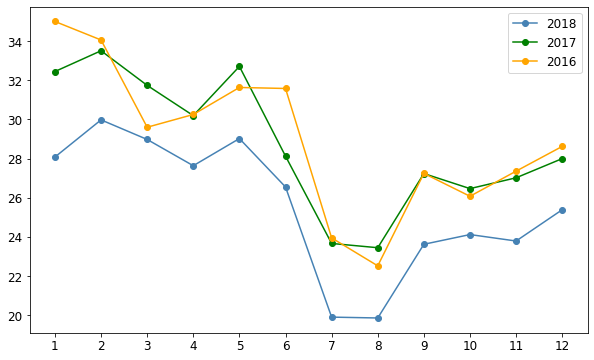

In [76]:
plt.figure(figsize=(10,6))
plt.plot(time_grp2, marker = 'o', color = 'steelblue');
plt.plot(time_grp3, marker = 'o', color = 'green');
plt.plot(time_grp4, marker = 'o', color = 'orange');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['2018', '2017', '2016']);

#### 3.3.2 Agent-based

In [93]:
trans_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

In [94]:
trans_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

In [95]:
trans_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()
trans_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Transaction ID'].count()

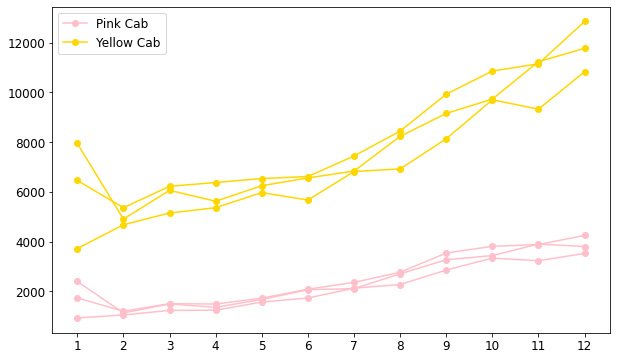

In [96]:
plt.figure(figsize=(10,6))
plt.plot(trans_grp1, marker = 'o', color = 'pink');
plt.plot(trans_grp2, marker = 'o', color = 'gold');
plt.plot(trans_grp3, marker = 'o', color = 'pink');
plt.plot(trans_grp4, marker = 'o', color = 'gold');
plt.plot(trans_grp5, marker = 'o', color = 'pink');
plt.plot(trans_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);

In [83]:
agent_grp1 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()
agent_grp2 = df[(df["Date of Travel"].dt.year==2018) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()

In [88]:
agent_grp3 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()
agent_grp4 = df[(df["Date of Travel"].dt.year==2017) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()

In [90]:
agent_grp5 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Pink Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()
agent_grp6 = df[(df["Date of Travel"].dt.year==2016) & (df['Company']=='Yellow Cab')].groupby(df['Date of Travel'].dt.month)['Net Margin %'].mean()

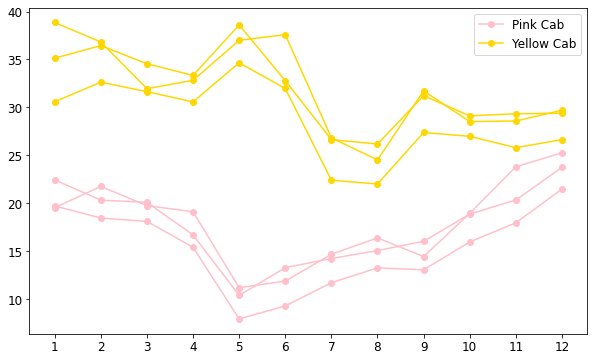

In [92]:
plt.figure(figsize=(10,6))
plt.plot(agent_grp1, marker = 'o', color = 'pink');
plt.plot(agent_grp2, marker = 'o', color = 'gold');
plt.plot(agent_grp3, marker = 'o', color = 'pink');
plt.plot(agent_grp4, marker = 'o', color = 'gold');
plt.plot(agent_grp5, marker = 'o', color = 'pink');
plt.plot(agent_grp6, marker = 'o', color = 'gold');
plt.xticks(np.arange(1, 13, 1.0));
plt.legend(['Pink Cab', 'Yellow Cab']);

## 4. Recommendations & Hypothesis

From the contextual analysis, we can see that there is an obvious seasonality in number of customers using the cab service across years from 2016 to 2018, which decreases from the beginnings of years till Marchs or Aprils, increases in Mays, drops dramatically from Junes, reaches the lowest in Julys and Augusts, and finally increases gradually to the ends of the years.
Also, the company 'Yellow Cab' has higher transactions during the whole year across years from 2016 to 2018 rather than the company 'Pink Cab', especially the latter parts of years; the company 'Yellow Cab' has higher net margin percentage during the whole year across years from 2016 to 2018 rather than the company 'Pink Cab' obviously.

Therefore, it is evident that there is a seasonality for cab market during every year. I recommend XYZ firm further investigate the more detailed reasons for seasonality and decide marketing strategies accordingly.